In [130]:
import sys 
import sklearn

In [131]:
import os 
datapath = os.path.join("dataset","lifestyle" ,"")

In [132]:
import matplotlib as mpl
mpl.rc("axes" , labelsize = 14)
mpl.rc("xtick" , labelsize = 12)
mpl.rc("ytick" , labelsize = 12)

In [133]:
import urllib.request
Download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath , exist_ok = True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading :" , filename)
    url = Download_root + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url , datapath+filename)

In [158]:
def prepare_country_stats(oecd_bli , gdp_per_capita):

    
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index = "Country" , columns = "Indicator" , values  = "Value")
    
    gdp_per_capita.rename(columns = {"2015" : "GDP per capita"} , inplace = True )
    gdp_per_capita.set_index("Country" , inplace = True)
    
    full_contry_stats = pd.merge(left = oecd_bli , right = gdp_per_capita , left_index = True , right_index =True)
    full_contry_stats.sort_values(by = "GDP per capita" , inplace = True )
    
    
    return full_contry_stats[["GDP per capita", 'Life satisfaction']]

(36, 2)


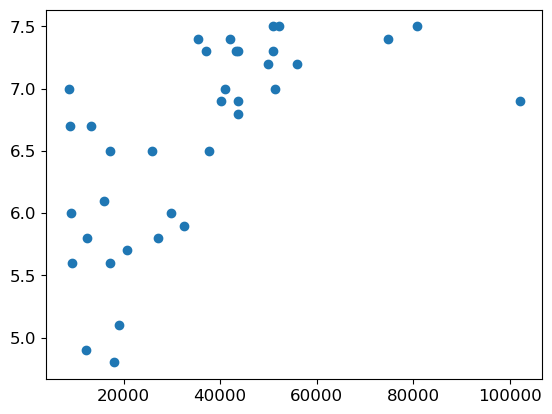

LinearRegression()

In [159]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sklearn.linear_model


oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv" , thousands = "," )
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv" , thousands ="," , delimiter = "\t" , encoding = "latin1" , na_values = "n/a")


country_stats = prepare_country_stats(oecd_bli , gdp_per_capita)
print(country_stats.shape)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

plt.scatter(x,y)
plt.show()

model = sklearn.linear_model.LinearRegression()

model.fit(x,y)

In [160]:
X_new = [[22587]]  
print(model.predict(X_new))

[[6.28653637]]
